In [3]:
%matplotlib inline
import os
import yaml
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [1]:
from ultralytics import YOLO

# Load the 50-epoch trained model
model = YOLO('runs/detect/train5/weights/best.pt')


image 1/1 /cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_44.png: 96x640 3 poles, 15.6ms
Speed: 1.0ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 96, 640)


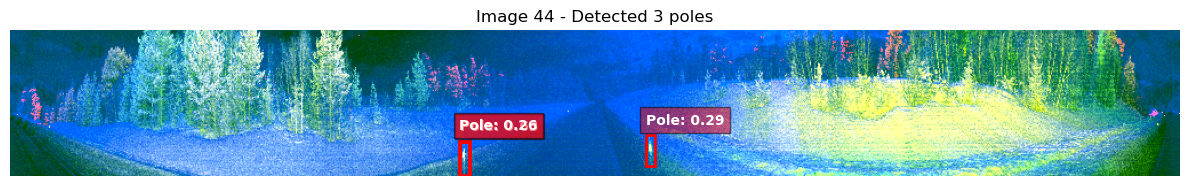


image 1/1 /cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_50.png: 96x640 3 poles, 103.0ms
Speed: 0.9ms preprocess, 103.0ms inference, 1.7ms postprocess per image at shape (1, 3, 96, 640)


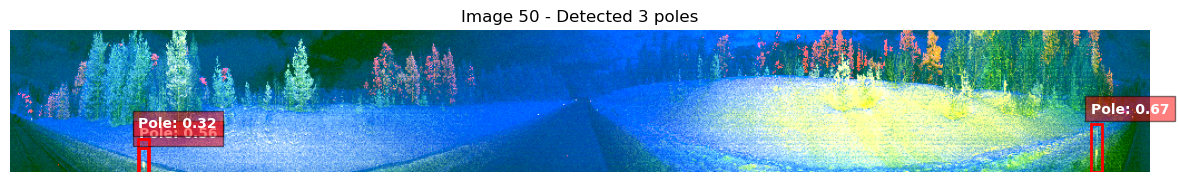


image 1/1 /cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_51.png: 96x640 2 poles, 102.2ms
Speed: 1.2ms preprocess, 102.2ms inference, 85.2ms postprocess per image at shape (1, 3, 96, 640)


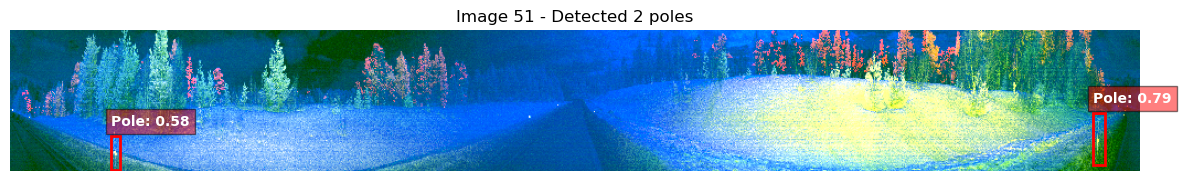


image 1/1 /cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_52.png: 96x640 1 pole, 100.7ms
Speed: 1.3ms preprocess, 100.7ms inference, 3.0ms postprocess per image at shape (1, 3, 96, 640)


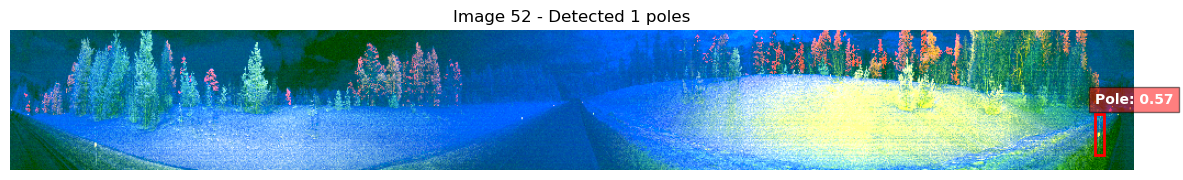

In [4]:
images = [44, 50, 51, 52]

for image in images:
    # Make prediction for this specific image
    results = model.predict(
        source=f"/cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_{image}.png",
        device="cuda",
    )
    
    # Get result for current image
    result = results[0]

    # Load the original image
    img = cv2.imread(f"/cluster/home/pettdalh/tdt4265_project/data/lidar_data/test/images/image_{image}.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Create figure and axes
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img)

    # Get the detection boxes
    boxes = result.boxes
    for box in boxes:
        # Get coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        confidence = float(box.conf[0])
        
        # Create rectangle
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1, 
            linewidth=2, 
            edgecolor='r', 
            facecolor='none'
        )
        
        # Add rectangle to plot
        ax.add_patch(rect)
        
        # Add confidence label
        ax.text(
            x1, y1-10, 
            f"Pole: {confidence:.2f}", 
            color='white', 
            fontweight='bold',
            bbox=dict(facecolor='red', alpha=0.5)
        )

    # Show plot
    plt.title(f"Image {image} - Detected {len(boxes)} poles")
    plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()